### Dawson Pallotta

# Lab Instructions are in Markdown Cells Throughout the Notebook

Making a professional notebook instructions:
* Add your name after classifying Notebook in the document name
* Update the headings to organize the notebook
* Answer the lab questions inside of markdown cells near the relevant code cells
* Add comments to explain what the code in each cell does

In [1]:
# this kernel imports the packages that are to be used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split #https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [2]:
#this kernel imports the data set that is to be used and prints its shape
data3 = pd.read_csv("C:/Users/student/Downloads/featureSet2weeksDepreST-CAT.csv")
print(data3.shape)
data3.head()

(369, 571)


,id,inTexts0_Absolute energy,inTexts0_Area under the curve,inTexts0_Autocorrelation,inTexts0_Centroid,inTexts0_ECDF Percentile Count_0,inTexts0_ECDF Percentile Count_1,inTexts0_ECDF Percentile_0,inTexts0_ECDF Percentile_1,inTexts0_ECDF_0,...,outCalls0_Wavelet variance_2,outCalls0_Wavelet variance_3,outCalls0_Wavelet variance_4,outCalls0_Wavelet variance_5,outCalls0_Wavelet variance_6,outCalls0_Wavelet variance_7,outCalls0_Wavelet variance_8,outCalls0_Zero crossing rate,phq9,gad7
0,00WRNS3MK,9.0,0.015,9.0,0.000000,2.0,11.0,0.0,0.0,0.071429,...,459.477150,470.749139,418.339485,359.621089,313.628753,279.227008,252.763489,6.0,19,17
1,053F3JF85,0.0,0.000,0.0,0.000000,0.0,0.0,0.0,0.0,0.071429,...,71313.172411,36465.583963,17095.999871,9816.542806,7844.960672,7736.559582,8121.111828,4.0,21,18
2,06YZBXW0E,3502.0,1.885,3502.0,0.052364,2.0,11.0,4.0,19.0,0.071429,...,204709.752186,186733.562302,156745.895593,133391.876158,117398.100146,106005.951572,97271.892871,4.0,4,2
3,0832IIHPX,12330.0,3.380,12330.0,0.057781,2.0,11.0,4.0,35.0,0.071429,...,41170.830053,29359.972379,20128.281500,15130.132857,12683.304503,11425.601575,10674.777554,8.0,7,6
4,0AS1KO35P,860.0,0.845,860.0,0.055721,2.0,11.0,1.0,8.0,0.071429,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,4,0


## Code from last week

In [10]:
# makes the values in the dataset binary, making values 1 or 0 
d10 = []
g10 = []
for i in range(0, data3.shape[0]):
    if int(data3.phq9[i]) >= 10:
        d10.append(1)
    else:
        d10.append(0)
    if int(data3.gad7[i]) >= 10:
        g10.append(1)
    else:
        g10.append(0)
data3["phq9"] = d10
data3["gad7"] = g10

In [9]:
#appends the following metrics to the dataset and prints the new data set's shape and then prints the data set itself
features = data3[data3.columns[1:-2]]
ids = data3[data3.columns[0:1]]
targets = data3[data3.columns[-2:]]
cnames = features.columns
print(features.shape)
features.head()

(369, 568)


,inTexts0_Absolute energy,inTexts0_Area under the curve,inTexts0_Autocorrelation,inTexts0_Centroid,inTexts0_ECDF Percentile Count_0,inTexts0_ECDF Percentile Count_1,inTexts0_ECDF Percentile_0,inTexts0_ECDF Percentile_1,inTexts0_ECDF_0,inTexts0_ECDF_1,...,outCalls0_Wavelet variance_0,outCalls0_Wavelet variance_1,outCalls0_Wavelet variance_2,outCalls0_Wavelet variance_3,outCalls0_Wavelet variance_4,outCalls0_Wavelet variance_5,outCalls0_Wavelet variance_6,outCalls0_Wavelet variance_7,outCalls0_Wavelet variance_8,outCalls0_Zero crossing rate
0,9.0,0.015,9.0,0.000000,2.0,11.0,0.0,0.0,0.071429,0.142857,...,1044.461838,595.378697,459.477150,470.749139,418.339485,359.621089,313.628753,279.227008,252.763489,6.0
1,0.0,0.000,0.0,0.000000,0.0,0.0,0.0,0.0,0.071429,0.142857,...,107303.053660,87506.881312,71313.172411,36465.583963,17095.999871,9816.542806,7844.960672,7736.559582,8121.111828,4.0
2,3502.0,1.885,3502.0,0.052364,2.0,11.0,4.0,19.0,0.071429,0.142857,...,224107.095817,218449.207781,204709.752186,186733.562302,156745.895593,133391.876158,117398.100146,106005.951572,97271.892871,4.0
3,12330.0,3.380,12330.0,0.057781,2.0,11.0,4.0,35.0,0.071429,0.142857,...,53971.533653,50730.442089,41170.830053,29359.972379,20128.281500,15130.132857,12683.304503,11425.601575,10674.777554,8.0
4,860.0,0.845,860.0,0.055721,2.0,11.0,1.0,8.0,0.071429,0.142857,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


In [11]:
# introduces a min max scaler to the above code 
#normalize each feature between 0 and 1
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(features)
sfeatures = pd.DataFrame(np_scaled, columns = cnames)
sfeatures.head()

,inTexts0_Absolute energy,inTexts0_Area under the curve,inTexts0_Autocorrelation,inTexts0_Centroid,inTexts0_ECDF Percentile Count_0,inTexts0_ECDF Percentile Count_1,inTexts0_ECDF Percentile_0,inTexts0_ECDF Percentile_1,inTexts0_ECDF_0,inTexts0_ECDF_1,...,outCalls0_Wavelet variance_0,outCalls0_Wavelet variance_1,outCalls0_Wavelet variance_2,outCalls0_Wavelet variance_3,outCalls0_Wavelet variance_4,outCalls0_Wavelet variance_5,outCalls0_Wavelet variance_6,outCalls0_Wavelet variance_7,outCalls0_Wavelet variance_8,outCalls0_Zero crossing rate
0,0.000045,0.001576,0.000045,0.000000,0.222222,1.0,0.000000,0.000,0.0,0.0,...,0.000029,0.000029,0.000031,0.000024,0.000019,0.000016,0.000014,0.000013,0.000013,0.6
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000,0.0,0.0,...,0.002951,0.004306,0.004751,0.001856,0.000771,0.000436,0.000360,0.000374,0.000417,0.4
2,0.017641,0.198108,0.017641,0.434450,0.222222,1.0,0.095238,0.152,0.0,0.0,...,0.006162,0.010749,0.013638,0.009505,0.007069,0.005930,0.005387,0.005122,0.004989,0.4
3,0.062112,0.355229,0.062112,0.479390,0.222222,1.0,0.095238,0.280,0.0,0.0,...,0.001484,0.002496,0.002743,0.001495,0.000908,0.000673,0.000582,0.000552,0.000548,0.8
4,0.004332,0.088807,0.004332,0.462298,0.222222,1.0,0.023810,0.064,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


In [6]:
# sets the number of features that are going to be used in the training set, creates the lists for the different variables 
# trains for the values of TN, TP, FP, FN, as welll appends the created lists with the values of the functions calculating 
# accuracy, sensitivity, specificity, precision,  balanced_accuracy, and F1_score
numberOfFeatures = 2
pcnames = []
for n in range(0, numberOfFeatures):
    pcnames.append("PC" + str(n))
pca = PCA(n_components=numberOfFeatures)
pca = pca.fit(sfeatures)
X_pca = pca.transform(sfeatures)
pcaDF = pd.DataFrame(X_pca, columns = pcnames)
pcaDF.head()

alist = []
senslist = []
speclist = []
preclist = []
balalist = []
F1list = []
for r in range(0, 25):
    X_train, X_test, y_train, y_test = train_test_split(pcaDF, targets["phq9"], test_size=0.33, random_state=r)
    clf = KNeighborsClassifier()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    conf_mat = confusion_matrix(y_test, y_pred)
    TN = conf_mat[0][0]
    TP = conf_mat[1][1]
    FP = conf_mat[0][1]
    FN = conf_mat[1][0]
    accuracy = (TP+TN)/(TN+TP+FP+FN)
    sensitivity = (TP)/(TP+FN)
    specificity = (TN)/(TN+FP)
    precision = (TP)/(TP+FP)
    balanced_accuracy = (specificity + sensitivity)/2
    F1_score = 2*(precision)*(sensitivity)/(precision + sensitivity)
    alist.append(accuracy)
    senslist.append(sensitivity)
    speclist.append(specificity)
    preclist.append(precision)
    balalist.append(balanced_accuracy)
    F1list.append(F1_score)

## Code modifications

Modify the above code to also calculate:
* sensitivity (also known as recall)
* specificity
* precision
* balanced accuracy
* F1 score

For each metric, the coding steps you will need to do are:
* initalize an empy list in the same place as alist (in above code)
* calulate the metric using TP, TN, FP, FN in the same place as accuracy (in above code)
* append your calculated metric to your list in the same place accuracy was appended to a list (in above code)
* print the average and the standard deviation of five new metrics just like accuracy (in below code) - I want to be able to see all six metrics in the notebook

You can Google the equations for the metrics. All can be calculated using TP, TN, FP, FN. However, you may prefer to use sensitivity and specificity to calcualte balanced accuracy as well as recall and precision to calculate the F1 score.

In [12]:
#This prints the values from the calculated variables of accuracy, sensitivity, specificity, presicion, balanced accuracy, 
# and F1 score, as well as the standard deviations that each of their calculations have 
print("Accuracy = " + str(round(sum(alist)/len(alist),2)) + " +- " + str(round(np.std(alist),2)))
print("Sensitivity = " + str(round(sum(senslist)/len(senslist),2)) + " +- " + str(round(np.std(senslist),2)))
print("Specificity = " + str(round(sum(speclist)/len(speclist),2)) + " +- " + str(round(np.std(speclist),2)))
print("Precision = " + str(round(sum(preclist)/len(preclist),2)) + " +- " + str(round(np.std(preclist),2)))
print("Balanced Accuracy = " + str(round(sum(balalist)/len(balalist),2)) + " +- " + str(round(np.std(balalist),2)))
print("F1 Score = " + str(round(sum(F1list)/len(F1list),2)) + " +- " + str(round(np.std(F1list),2)))


Accuracy = 0.51 +- 0.03
Sensitivity = 0.62 +- 0.07
Specificity = 0.38 +- 0.08
Precision = 0.56 +- 0.04
Balanced Accuracy = 0.5 +- 0.03
F1 Score = 0.59 +- 0.03


### Which metric have the highest and lowest scores?
##### The metric with the highest score is sensitivity and the lowest metric is specificity.
### Which metrics have the highest and lowest standard deviation?
##### The metric with the highest standard deviation is specificity with .08 and the  lowest is accuracy, balanced accuracy, and F1 score with standard deviation of .03.

## Plots

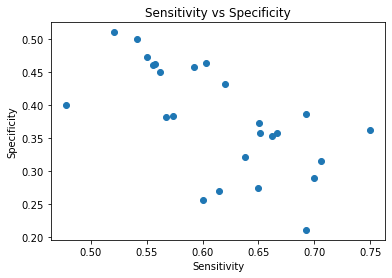

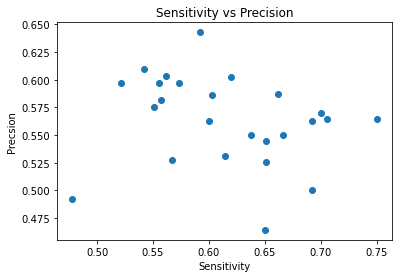

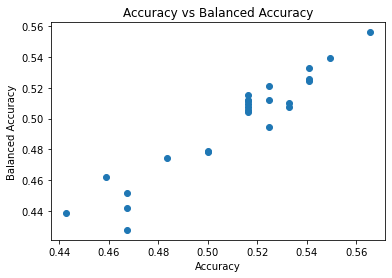

In [13]:
#creates the scatter plots of different variables, using sensitivity, specififcity, precesion, accuracy and balanced accuracy
plt.scatter(senslist,speclist) #(xaxis, yaxis)
plt.title("Sensitivity vs Specificity")
plt.xlabel("Sensitivity")
plt.ylabel("Specificity")
plt.show()
plt.close()

plt.scatter(senslist,preclist) #(xaxis, yaxis)
plt.title("Sensitivity vs Precision")
plt.xlabel("Sensitivity")
plt.ylabel("Precsion")
plt.show()
plt.close()

plt.scatter(alist,balalist) #(xaxis, yaxis)
plt.title("Accuracy vs Balanced Accuracy")
plt.xlabel("Accuracy")
plt.ylabel("Balanced Accuracy")
plt.show()
plt.close()

### Plotting Modifications and Questions

Update the plots:
* For the first, plot sensitivity vs specificity. 
* For the second, plot recall vs precision. 
* For the third, plot accuracy vs balanced accuracy

Answer the questions about the plots:
* In the first two plots, what do you notice about the relation of the metrics?
###### The metrics appear to have a slightly negative correlation.
* Given that balanced accuracy is calculated with sensitivity and specificity, what does the first plot indicate about balanced accuracy?
###### The first plot indicates that the balanced accuracy of is poor as it has a low numerical value of .5 as well as the plot showing that the balance accuracy seems to be visually diffrent between the variables of sensitivity and specifitiy  as teh lower the two are the more they become scattered.
* Given that the F1 score is calculated with recall and precision, what does the second plot indicate about the F1 score?
###### The second plot indicats that the F1 score isn't al that good as the two varibles used in this graph seem to have almost no correlation with each other, the points seems to be random
* In the third plot, what do you notice about the relation of the metrics?
###### The relation that the two seem to have is great positive correlation.